# 계층적인 트리로 클러스터 조직화

In [1]:
# 랜덤 데이터셋 만들기

import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [2]:
# 거리행렬 계산하기

### 빈칸 1
### 거리행렬 계산하는 모듈과 함수 임포트
from scipy.spatial.distance import pdist, squareform

### 빈칸 2
### 거리행렬 계산
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [5]:
### 빈칸 3
### 연결행렬 반환하는 모듈과 함수 임포트
from scipy.cluster.hierarchy import linkage

### 빈칸 4
### 축약된 거리행렬을 사용해서 완전연결병합 적용하기
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [6]:
### 빈칸 5
### 입력 샘플 행렬을 사용해서 완전연결병합 적용하기
### 결과는 축약 거리 행렬 사용한 것과 동일

row_clusters = linkage(df.values, method='complete',metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


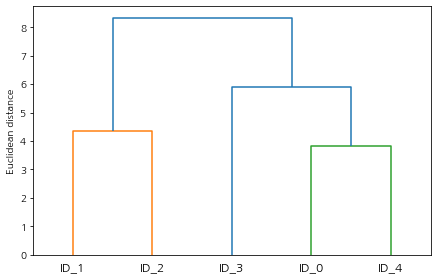

In [8]:
# 덴드로그램 그리기

### 빈칸 6
### 덴드로그램 그리는 모듈과 함수 임포트
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

### 빈칸 7
### 덴드로그램 그리기
### label = labels
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.show()

In [9]:
# AgglomerativeClustering 클래스 활용하기
from sklearn.cluster import AgglomerativeClustering

### 빈칸 8
### 병합군집 클래스로
### 완전연결방식 사용하여 3개의 클러스터로 만들기
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [1 0 0 2 1]
